# Erosion and Dilation
## Erosion（腐蚀）
> * 腐蚀使图像中白色高亮部分被腐蚀，腐蚀的效果拥有比原图更小的高亮区域，可以去掉毛刺，去掉孤立的像素，提取骨干信息。
> * OpenCV 提供了函数 ```cv2.erode``` 可以实现图像的腐蚀。
> * 函数说明：```dst=cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) ```
>   * 函数 ```cv2.erode``` 使用指定的结构元（卷积核）侵蚀源图像，结构元确定像素邻域的形状，在该邻域上取最小值：
![](https://ai-studio-static-online.cdn.bcebos.com/cb64bca8aca44863a7764f57fe2ca85d4ce6a089eb18445e9ee2a548958f891c)
>   * 参数说明：
>       * src：输入图像，可以为单通道或多通道，图像深度必须为 CV_8U, CV_16U, CV_16S, CV_32F 或 CV_64F
>       * dst：输出图像，大小和类型与 src 相同
>       * kernel：结构元（卷积核），null 时使用 3*3 矩形结构元素
>       * anchor：卷积核的锚点位置，默认值 (-1, -1) 表示以卷积核的中心为锚点
>       * iterations：应用腐蚀操作的次数，可选项，默认值为 1
>       * borderType：边界扩充的类型
>       * borderValue：当 borderType=BORDER_CONSTANT 时以常量 value 填充扩充边界，默认值为 (0,0,0)


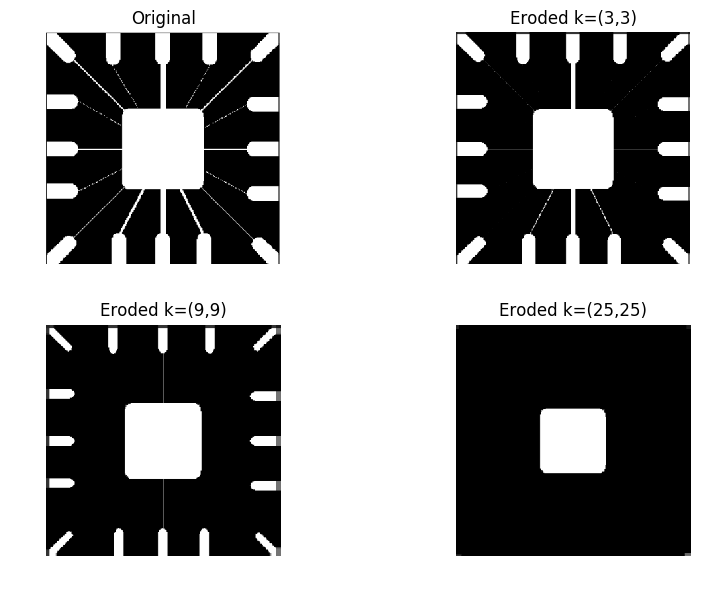

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 图像的腐蚀
img=cv2.imread("data/wirebond-mask.tif",0)

# 图像腐蚀
ksize=(3,3)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode1=cv2.erode(img,kernel=kernel)

ksize=(9,9)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode2=cv2.erode(img,kernel=kernel)

ksize=(25,25)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode3=cv2.erode(img,kernel=kernel)

# display
images=[img,imgErode1,imgErode2,imgErode3]
titles=["Original","Eroded k=(3,3)","Eroded k=(9,9)","Eroded k=(25,25)"]
plt.figure(figsize=(9,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()



## Dilation
> * 膨胀使图像中的白色高亮部分进行膨胀，膨胀效果拥有比原图更大的高亮区域，可以填补图像缺陷，用来扩充边缘或填充小的孔洞，也可以用来连接两个分开的物体。
> * OpenCV 提供了函数``` cv2.dilate ```可以实现图像的膨胀。
> * 函数说明：```dst=cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) ```
>   * 函数 ```cv2.dilate ```使用指定的结构元（卷积核）膨胀源图像，结构元确定像素邻域的形状，在该邻域上取最大值：
>   * 参数说明：
>       * src：输入图像，可以为单通道或多通道，图像深度必须为 CV_8U, CV_16U, CV_16S, CV_32F 或 CV_64F
>       * dst：输出图像，大小和类型与 src 相同
>       * kernel：结构元（卷积核），null 时使用 3*3 矩形卷积核
>       * anchor：卷积核的锚点位置，默认值 (-1, -1) 表示以卷积核的中心为锚点
>       * iterations：应用膨胀的次数，可选项，默认值为 1
>       * borderType：边界扩充的类型
>       * borderValue：当 borderType=BORDER_CONSTANT 时以常量 value 填充扩充边界，默认值为 (0,0,0)


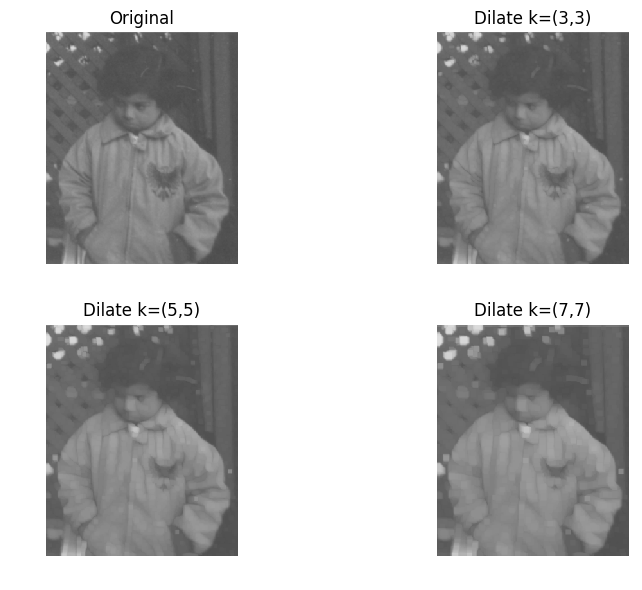

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 图像的膨胀
img=cv2.imread("data/text_gaps_1_and_2_pixels.tif",0)

#图像膨胀
ksize=(3,3)
kernel=np.ones(ksize,dtype=np.uint8)
# kernel=np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
imgDilate1=cv2.dilate(img,kernel=kernel)

ksize=(5,5)
kernel=np.ones(ksize,dtype=np.uint8)
imgDilate2=cv2.dilate(img,kernel=kernel)

ksize=(7,7)
kernel=np.ones(ksize,dtype=np.uint8)
imgDilate3=cv2.dilate(img,kernel=kernel)

# display
images=[img,imgDilate1,imgDilate2,imgDilate3]
titles=["Original","Dilate k=(3,3)","Dilate k=(5,5)","Dilate k=(7,7)"]
plt.figure(figsize=(9,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

# Opening and Closing

## Opening
> * 膨胀扩展集合的组成部分，而腐蚀缩小集合的组成部分。开运算就是先腐蚀后膨胀的过程，通常用于去除噪点、断开狭窄的狭颈、消除细长的突出、平滑物体边界但不改变面积。
> * OpenCV 提供了函数 ```cv2.morphologyEx```可以实现图像的开运算。
> * 函数说明：```dst=cv.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])```
>   * 参数说明：
>       * src：输入图像，可以为单通道或多通道，图像深度必须为 CV_8U, CV_16U, CV_16S, CV_32F 或 CV_64F
>       * dst：输出图像，大小和类型与 src 相同
>       * op：形态学运算类型
>           * cv2.MORPH_ERODE：腐蚀
>           * cv2.MORPH_DILATE：膨胀
>           * cv2.MORPH_OPEN：开运算， 先腐蚀再膨胀
>           * cv2.MORPH_CLOSE：闭运算， 先膨胀再腐蚀
>           * cv2.MORPH_GRADIENT：形态学梯度， 膨胀图与腐蚀图之差
>           * cv2.MORPH_TOPHAT：顶帽变换， 原图像与开运算之差
>           * cv2.MORPH_BLACKHAT：黑帽变换， 闭运算图与原图像之差
>           * cv2.MORPH_HITMISS： 击中击不中运算
>       * kernel：结构元（卷积核），null 时使用 3*3 矩形卷积核
>       * anchor：卷积核的锚点位置，负值表示以卷积核的中心为锚点
>       * iterations：应用腐蚀和膨胀的次数，可选项，默认值为 1
>       * borderType：边界扩充的类型
>       * borderValue：当 borderType=BORDER_CONSTANT 时以常量 value 填充扩充边界，默认值为 (0,0,0)
>   * 注意:迭代次数是应用腐蚀和膨胀操作的次数，注意两次迭代的开操作相当于应用“腐蚀→腐蚀→膨胀→膨胀”，而不是“腐蚀→膨胀→腐蚀→膨胀”。

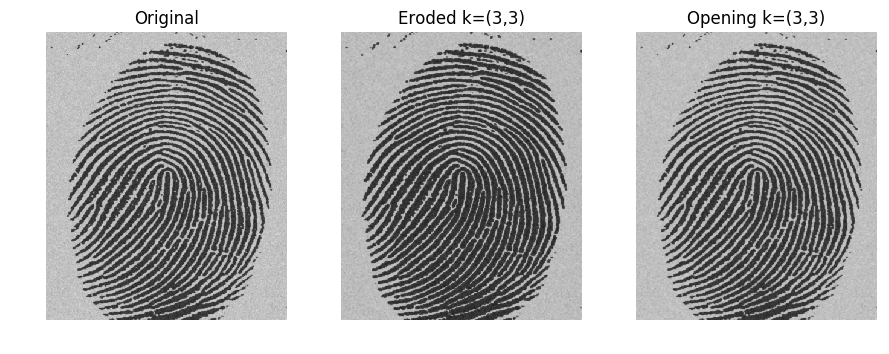

In [4]:
## 图像开运算
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/noisy_fingerprint.tif",0)

ksize=(3,3)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode=cv2.erode(img,kernel=kernel)

imgOpen=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)


# display
images=[img,imgErode,imgOpen]
titles=["Original","Eroded k=(3,3)","Opening k=(3,3)"]
plt.figure(figsize=(9,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

## Closing
> * 闭运算就是先膨胀后腐蚀的过程，通常用于弥合狭窄的断裂和细长的沟壑，消除小孔，填补轮廓中的缝隙，消除噪点，连接相邻的部分。
> * OpenCV 中的函数 ```cv2.morphologyEx``` 也可以实现图像的闭运算，将参数 ```op``` 设为 ```MORPH_CLOSE```。

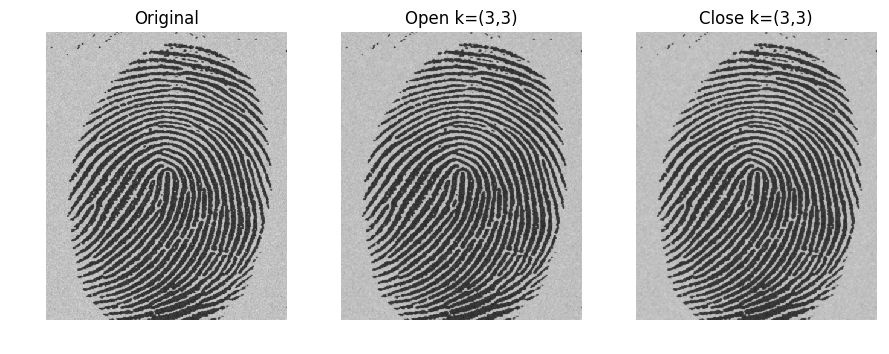

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 图像的闭运算（图像->开操作->闭操作）
img=cv2.imread("data/noisy_fingerprint.tif",0)

ksize=(3,3)
kernel=np.ones(ksize,dtype=np.uint8)
imgOpen=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel=kernel)

imgClose=cv2.morphologyEx(imgOpen,cv2.MORPH_CLOSE,kernel=kernel)


# display
images=[img,imgOpen,imgClose]
titles=["Original","Open k=(3,3)","Close k=(3,3)"]
plt.figure(figsize=(9,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

# Compound Operations（组合操作！！很重要！！）
## boundary extraction
> * 内边界的提取可以利用图像的腐蚀处理得到原图像的一个收缩，再将收缩结果与目标图像进行异或运算，实现差值部分的提取。
> * 集合 A 的边界 $\beta (A)$ 可以通过合适的结构元 B 腐蚀集合 A，然后求 A 与腐蚀结果的差集来实现：
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/ea9d79282f8e446bba359212791a01af8c2f39f75d2b4d9aa4512bf0d602cc60)
> * 类似地，外边界提取先对图像进行膨胀处理，然后用膨胀结果与原目标图像进行异或运算，也就是求膨胀结果与原目标图像的差集。

## exercise1
> * Adjust the size of k, show three results at least. Then,discuss the variation reasons of edge extraction results.

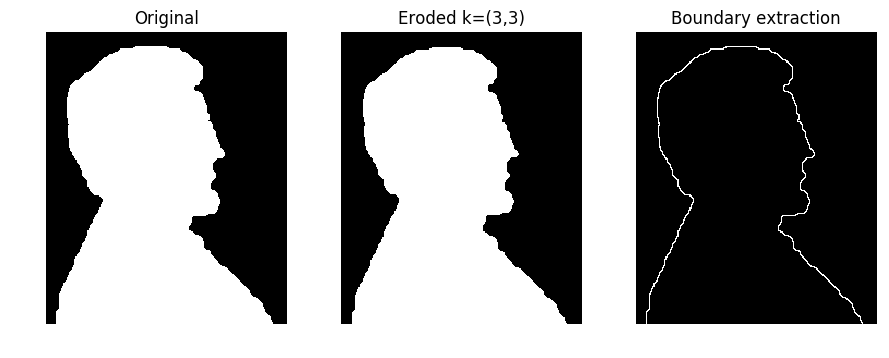

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 形态算法之边界提取
img=cv2.imread("data/licoln-from-penny.tif",0)


##### coding here

ksize=(3,3)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode=cv2.erode(img,kernel=kernel)
# 图像边界提取
imgBound = img - imgErode  

# display
images=[img,imgErode,imgBound]
titles=["Original","Eroded k=(3,3)","Boundary extraction"]
plt.figure(figsize=(9,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

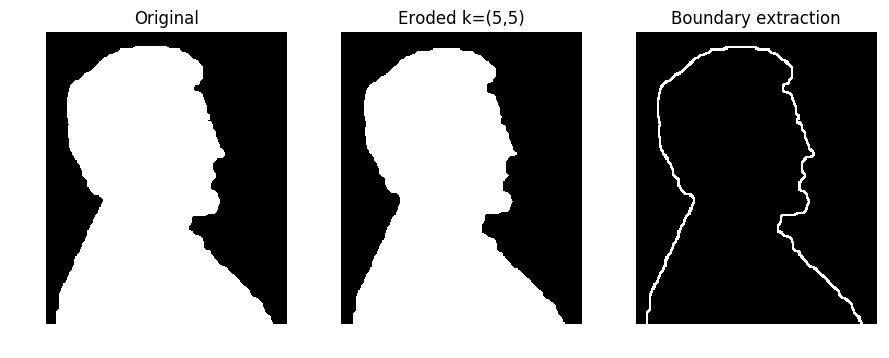

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 形态算法之边界提取
img=cv2.imread("data/licoln-from-penny.tif",0)


##### coding here

ksize=(5,5)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode=cv2.erode(img,kernel=kernel)
# 图像边界提取
imgBound = img - imgErode  

# display
images=[img,imgErode,imgBound]
titles=["Original","Eroded k=(5,5)","Boundary extraction"]
plt.figure(figsize=(9,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

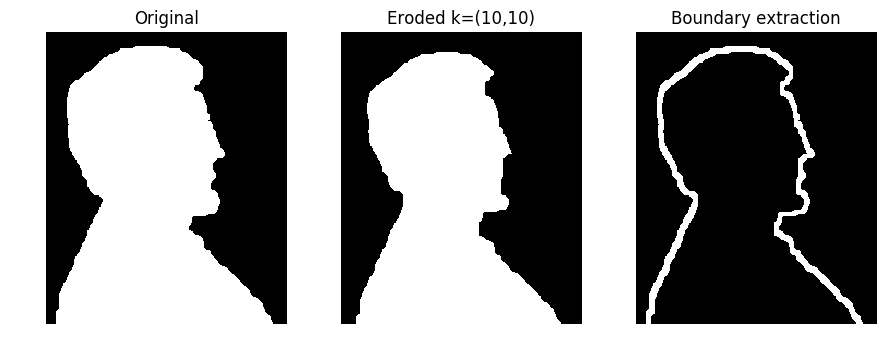

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 形态算法之边界提取
img=cv2.imread("data/licoln-from-penny.tif",0)


##### coding here

ksize=(10,10)
kernel=np.ones(ksize,dtype=np.uint8)
imgErode=cv2.erode(img,kernel=kernel)
# 图像边界提取
imgBound = img - imgErode  

# display
images=[img,imgErode,imgBound]
titles=["Original","Eroded k=(10,10)","Boundary extraction"]
plt.figure(figsize=(9,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray",vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

![](https://ai-studio-static-online.cdn.bcebos.com/6e6d5841e2944e1facebd786feb587ef61e1f16b2ada4bb78d313e4986247639)


## your discussion

可以发现随着kernel_size的增大，Eroded图像的区域面积越小，但是对于相减之后的Boundary extraction的边缘结果越粗越明显。




## region filling
> * 形态学闭运算可以用来实现孔洞填充，闭运算先膨胀后腐蚀操作，膨胀使白色高亮区域增加，孔洞会被填充，但需要准确设置核大小，因此不是通用的方法。
> * 约束膨胀孔洞填充：构造一个元素为 0 的阵列 $X{0}$,其中对应孔洞的像素值为 1，采用迭代过程可以填充所有的孔洞：
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/822eb2ce4f2046aa9b30ed55802ff1563bf2017b37c143eda3ab701843fa4ff3)
> * 先找到孔洞中的一个点，用结构元进行膨胀，然后用原始图像的补集进行约束（交集运算），不断迭代重复这一操作直到算法收敛，就得到孔洞填充图。

> * 在前面的例子中我们使用``` Numpy``` 构建了结构化元素，它是正方形的。但有时我们需要构建一个椭圆形/圆形的核。为了实现这种要求，提供了 OpenCV函数 ```cv2.getStructuringElement()```。



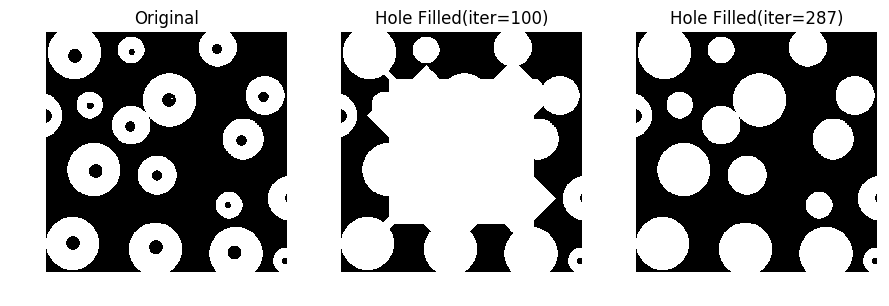

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 约束膨胀算法实现孔洞填充
img=cv2.imread("data/region-filling-reflections.tif",0)
imgInv=cv2.bitwise_not(img)

#构造3×3十字形
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# print(kernel)

# 构建阵列F，写入imgInv得的边界值
F=np.zeros(img.shape,np.uint8)
F[:,0]=imgInv[:,0]
F[:,-1]=imgInv[:,-1]
F[0,:]=imgInv[0,:1]
F[-1,:]=imgInv[-1,:]

# 循环迭代：对F进行膨胀，膨胀结果于imgInv进行AND操作
Flast=F.copy()
for i in range(1000):
    F_dilation=cv2.dilate(F,kernel)
    F=cv2.bitwise_and(F_dilation,imgInv)
    if(F==Flast).all():
        break
    else:
        Flast=F.copy()
    # 提取出中间结果
    if i==100:
        imgF100=F

# display
plt.figure(figsize=(9,6))
images=[img,cv2.bitwise_not(imgF100),cv2.bitwise_not(F)]
titles=['Original','Hole Filled(iter=100)',"Hole Filled(iter={})".format(i)]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

## detect foreign objects
> * 构造一个元素为 0 的阵列$X0$，其中对应连通分量的像素值为1，采用迭代过程可以得到所有的连通分量：
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/90c6fd43d8bc467caf674cff31bc14d774fbdbfdbeab45f68eee096628e7b68a)
> * 该算法与约束膨胀孔洞填充的思路相同，使用条件膨胀来限制膨胀的增长，但用$I$代替$I^c$以寻找前景点。



第1个连通分量为1311
第2个连通分量为2038
第3个连通分量为897
第4个连通分量为117
第5个连通分量为68
第6个连通分量为106
第7个连通分量为69
第8个连通分量为1
第9个连通分量为111
第10个连通分量为244
第11个连通分量为200
第12个连通分量为1


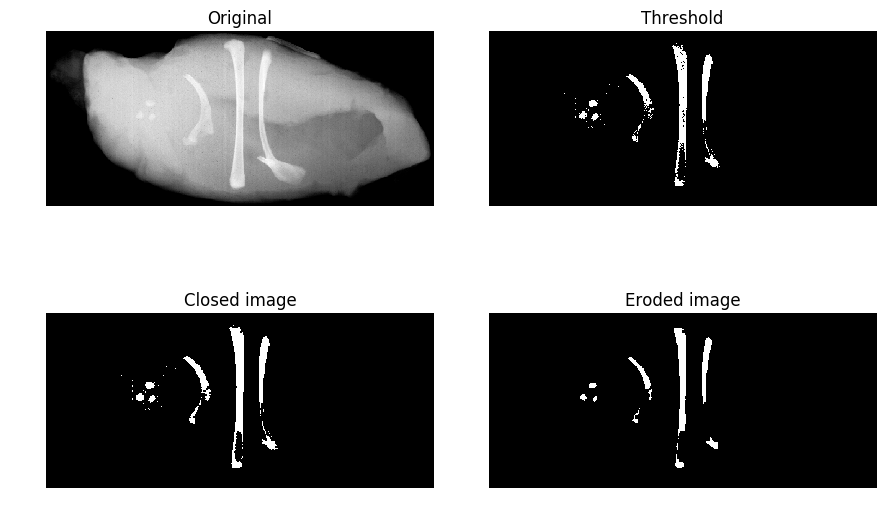

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 约束膨胀算法提取连通分量
img=cv2.imread("data/Chickenfilet with bones.tif",0)

# 预处理
# 二值化处理
ret, imgThresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)  
kernel = np.ones((3, 3), dtype=np.uint8) 
# 闭运算，消除噪声
imgClose=cv2.morphologyEx(imgThresh,cv2.MORPH_CLOSE,kernel)
# 腐蚀运算，腐蚀亮点
imgErode=cv2.erode(imgClose,kernel=kernel)

imgErodeCopy=imgErode.copy()
X=np.zeros(imgErode.shape,dtype=np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
count = []
#  循环迭代，直到 imgErodeCopy 中的像素值全部为0
while imgErodeCopy.any():
    Xa_copy,Ya_copy=np.where(imgErodeCopy > 0)
    X[Xa_copy[0]][Ya_copy[0]] = 255
    # 约束膨胀，先对X膨胀,再对imgErode执行与操作
    for i in range(100):
        dilation_X=cv2.dilate(X,kernel)
        X=cv2.bitwise_and(dilation_X,imgErode)
    
    Xb,Yb=np.where(X>0)
    imgErodeCopy[Xb,Yb]=0

    # 显示连通分量及其包含像素数量
    count.append(len(Xb))
    lenCount = len(count)
    if lenCount==0:
        print("无连通分量")
    elif lenCount==1:
        print("第1个连通分量为{}".format(count[0]))
    else:
        print("第{}个连通分量为{}".format(len(count),count[-1]-count[-2]))

# display
plt.figure(figsize=(9, 6))
images=[img,imgThresh,imgClose,imgErode]
titles=["Original","Threshold","Closed image","Eroded image"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()


## convex hull(凸壳)
> * 任意物体 A 的凸壳是包含 A 的最小凸物体。在二维图像中凸壳可以想象为一条刚好包着所有点的橡皮圈。在凸壳与物体边缘之间的部分称为凸陷。
> * 使用形态学算法，令 $B^i$表示 4个特定的结构元，反复使用$B^i$对$A$做击中击不中变换，直至收敛，就可以得到二值图像$I$中嵌入的前景图像集合$A$ 的凸壳的近似$C(A)$：
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/305008bb11a04986b57cd261f05199b981ae3a88da464e67a67c7fde081523db)
>   *   **A∗B=(AΘE)⋂(AcΘF)**
> * OpenCV 中提供了函数```cv2.convexHull``` 可以获取轮廓的凸壳 。
> * 函数说明：```hull=cv2.convexHull(points[, hull[, clockwise[, returnPoints]]])```
> * 参数说明：
>   * points：输入图像，可以为单通道或多通道
>   * hull：输出凸包，凸包点的索引向量，或凸包点集的向量
>   * clockwise：方向标志，True 表示顺时针方向输出凸包，否则为逆时针方向输出
>   * returnPoints：操作标志，True 表示返回凸包点集，否则返回凸包点的索引
> * 先使用 OpenCV 中的```cv2.findContour``` 函数找到二值图像中的所有轮廓，然后使用 ```cv2.convexHull``` 函数构造轮廓的凸包，最后使用 ```cv2.drawContours``` 函数绘制轮廓和凸包 。


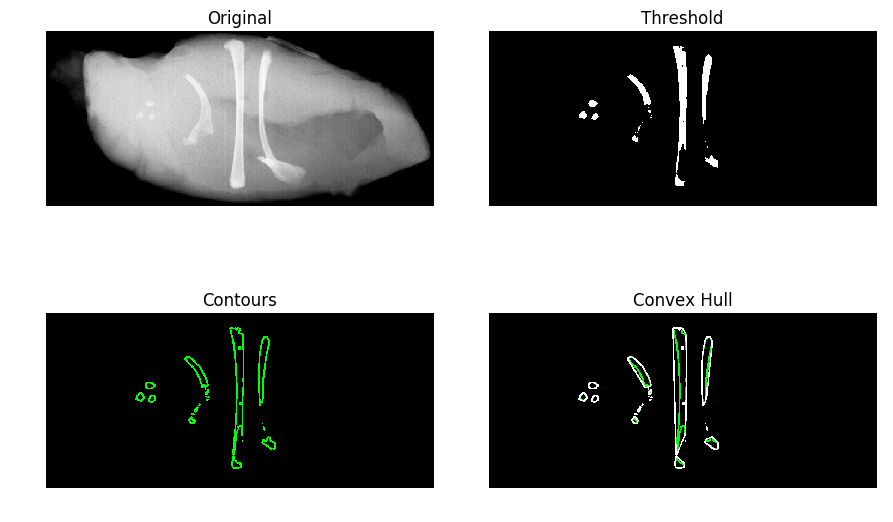

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 形态算法之凸壳
img=cv2.imread("data/Chickenfilet with bones.tif")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# 去除噪点
imgBlur = cv2.blur(imgGray, (3, 3)) 
# 二值化处理
ret, imgBin = cv2.threshold(imgBlur, 200, 255, cv2.THRESH_BINARY) 
# 寻找所有的轮廓
contours, hierarchy = cv2.findContours(imgBin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
hullAll=[]
for i in range(len(contours)):
    hull=cv2.convexHull(contours[i],False)
    hullAll.append(hull)
# 设置轮廓的颜色
colorContours = (0, 255, 0)  
# 设置凸包的颜色
colorConvexHull=(255, 255, 255) 
imgContours=np.zeros(img.shape,np.uint8)
# 绘制轮廓线
for i in range(len(contours)):
    cv2.drawContours(imgContours,contours,i,colorContours,2,8,hierarchy)
    imgDrawing = imgContours.copy()
for i in range(len(contours)):  # 绘制凸包线
    cv2.drawContours(imgDrawing, hullAll, i, colorConvexHull, 2, 8)

# display
plt.figure(figsize=(9, 6))
images=[imgGray,imgBin,cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB),cv2.cvtColor(imgDrawing, cv2.COLOR_BGR2RGB)]
titles=["Original","Threshold","Contours","Convex Hull"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()



## skeletons
> * 骨架可以用腐蚀和开运算来表示,，可以用重建开运算来实现。
>   * ![](https://ai-studio-static-online.cdn.bcebos.com/4c0c9bf446eb4a06a01b4c191bdece07ee209778391946b7ae37f2b1d92d994f)



## exercise2
> * programming for skeleton extraction
> * Try to get a perfect result

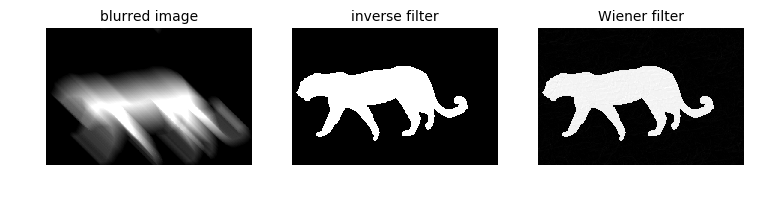

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#  退化图像的维纳滤波 (Wiener filter)
def getMotionDsf(img, angle, dist):
    xCenter = img.shape[0]// 2
    yCenter = img.shape[1]// 2
    sinVal = np.sin(angle * np.pi / 180)
    cosVal = np.cos(angle * np.pi / 180)
     # 点扩散函数
    PSF = np.zeros(img.shape[:2]) 
    # 将对应角度上motion_dis个点置成1
    for i in range(dist):  
        xOffset = round(sinVal * i)
        yOffset = round(cosVal * i)
        PSF[int(xCenter - xOffset), int(yCenter + yOffset)] = 1
        # 归一化
    return PSF / PSF.sum()

# 对图片进行运动模糊,返回经运动模糊的图片
def makeBlurred(img, PSF, eps):
    # 进行二维数组的傅里叶变换 
    fftImg = np.fft.fft2(img)  
    fftPSF = np.fft.fft2(PSF) + eps
    fftBlur = np.fft.ifft2(fftImg * fftPSF)
    fftBlur = np.abs(np.fft.fftshift(fftBlur))
    return fftBlur

 # 逆滤波,返回处理后的图像
def inverseFilter(img, PSF, eps): 
    fftImg = np.fft.fft2(img)
    # 噪声功率，这是已知的，考虑epsilon
    fftPSF = np.fft.fft2(PSF) + eps  
    #傅里叶反变换
    imgInvFilter = np.fft.ifft2(fftImg / fftPSF) 
    imgInvFilter = np.abs(np.fft.fftshift(imgInvFilter))
    return imgInvFilter

# 维纳滤波，K=0.01
def wienerFilter(img, PSF, eps, K=0.01):  
    fftImg = np.fft.fft2(img)
    fftPSF = np.fft.fft2(PSF) + eps
    # np.conj返回共轭
    fftWiener = np.conj(fftPSF) / (np.abs(fftPSF)**2 + K)
    imgWienerFilter = np.fft.ifft2(fftImg * fftWiener)
    imgWienerFilter = np.abs(np.fft.fftshift(imgWienerFilter))
    return imgWienerFilter


# 读取原始图像
img = cv2.imread("./data/134052.png", 0)  

# 不含噪声的运动模糊
PSF = getMotionDsf(img, -45, 100)
imgBlurred = makeBlurred(img, PSF, 1e-6)
imgInvFilter = inverseFilter(imgBlurred, PSF, 1e-6)
imgWienerFilter = wienerFilter(imgBlurred, PSF, 1e-6 ,K=0.000001) 

# # 带有噪声的运动模糊
# # 噪声方差
# scale = 0.05 
# # 添加高斯噪声
# noisy = imgBlurred.std() * np.random.normal(loc=0.0, scale=scale, size=imgBlurred.shape) 
# # 带有噪声的运动模糊
# imgBlurNoisy = imgBlurred + noisy
# # 对添加噪声的模糊图像进行逆滤波
# imgNoisyInv = inverseFilter(imgBlurNoisy, PSF, scale)  
# # 对添加噪声的模糊图像进行维纳滤波
# imgNoisyWiener = wienerFilter(imgBlurNoisy, PSF, scale,K=0.01)

#display
images=[imgBlurred,imgInvFilter,imgWienerFilter]
titles=['blurred image','inverse filter','Wiener filter']
# [“模糊图像”，“逆滤波器”，“维纳滤波器”]
plt.figure(figsize=(9, 7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i],fontsize=10)
    plt.axis("off")


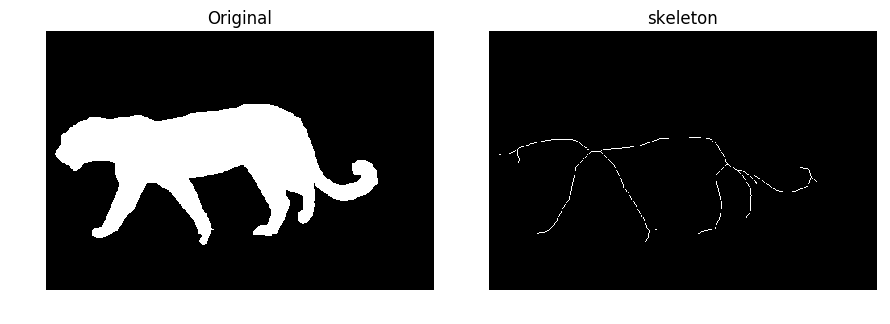

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology,data,color


## 形态算法之提取骨架 (重建开运算)
##读取图像
Inverse_imgGray = cv2.imread("data/134052.png", 0) 

#### coding here

## 图像二值化

_,binary = cv2.threshold(img,200,255,cv2.THRESH_BINARY)


## 骨架提取——使用 morphology.skeletonize 函数实现骨架提取

binary[binary==255] = 1
skeleton = morphology.skeletonize(binary)


# display
plt.figure(figsize=(9, 6))
images=[binary,skeleton]
titles=["Original","skeleton"]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

